In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [7]:
dataset = pd.read_csv('/Users/z002pjf/Downloads/auto-mpg.csv')

In [8]:
dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [9]:
dataset.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


In [10]:
feature = dataset['displacement']
target_var = dataset['mpg']

In [11]:
def line(m,x,c):
    return m*x+c
def error(m,x,c,MPG):
    return np.mean((line(m,x,c) - MPG)**2)
def derivative_slope(m,x,c,MPG):
    return 2 * np.mean((line(m,x,c)-MPG)*x)
def derivative_intercept(m,x,c,MPG):
    return 2 * np.mean((line(m,x,c)-MPG)*1)

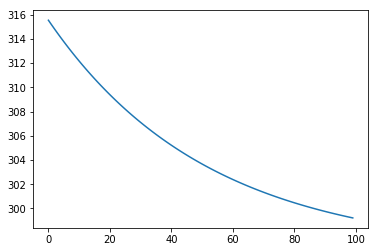

In [15]:
m= random.random()
c = random.random()
m = 0.1
c = 0.2
cost = []
alpha = 0.0000001
for i in range(0,100):
    m = m - alpha * derivative_slope(m,feature,c,target_var)
    c = c - alpha * derivative_intercept(m, feature, c, target_var)
    cost.append(error(m,feature, c,target_var))\
  
# print(cost)
plt.plot(cost)
plt.show()